# Main Library

In [1]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.preprocessing import LabelEncoder

# Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Reading Data
data = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Heart_Disease\heart_disease_data.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# information ==> Data  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## All Data is integer & Data not have Null Values

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


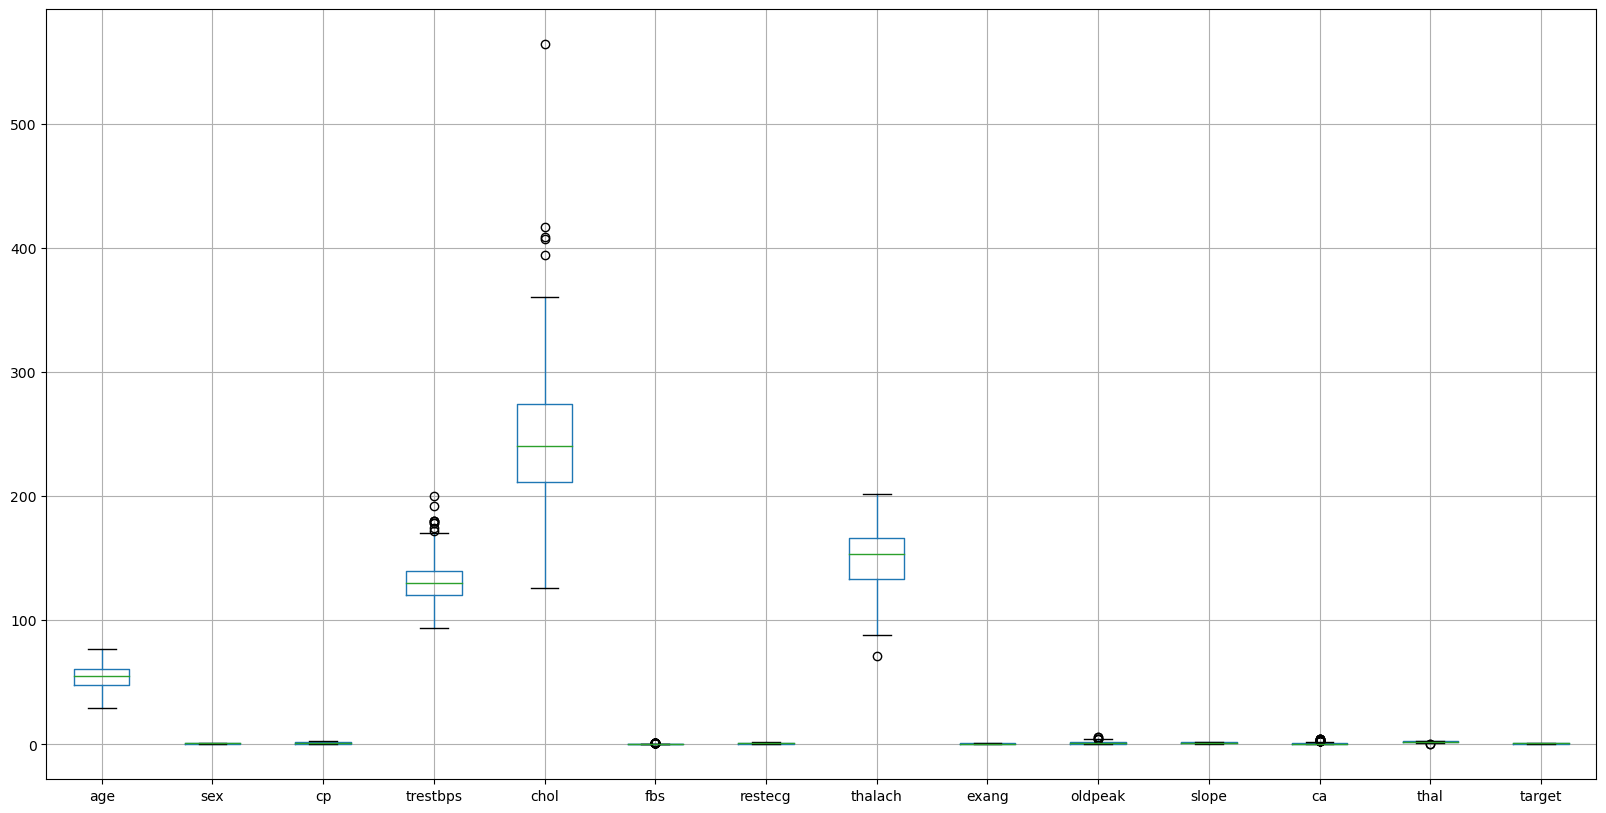

In [7]:
data.boxplot(figsize=(20,10));
plt.show()

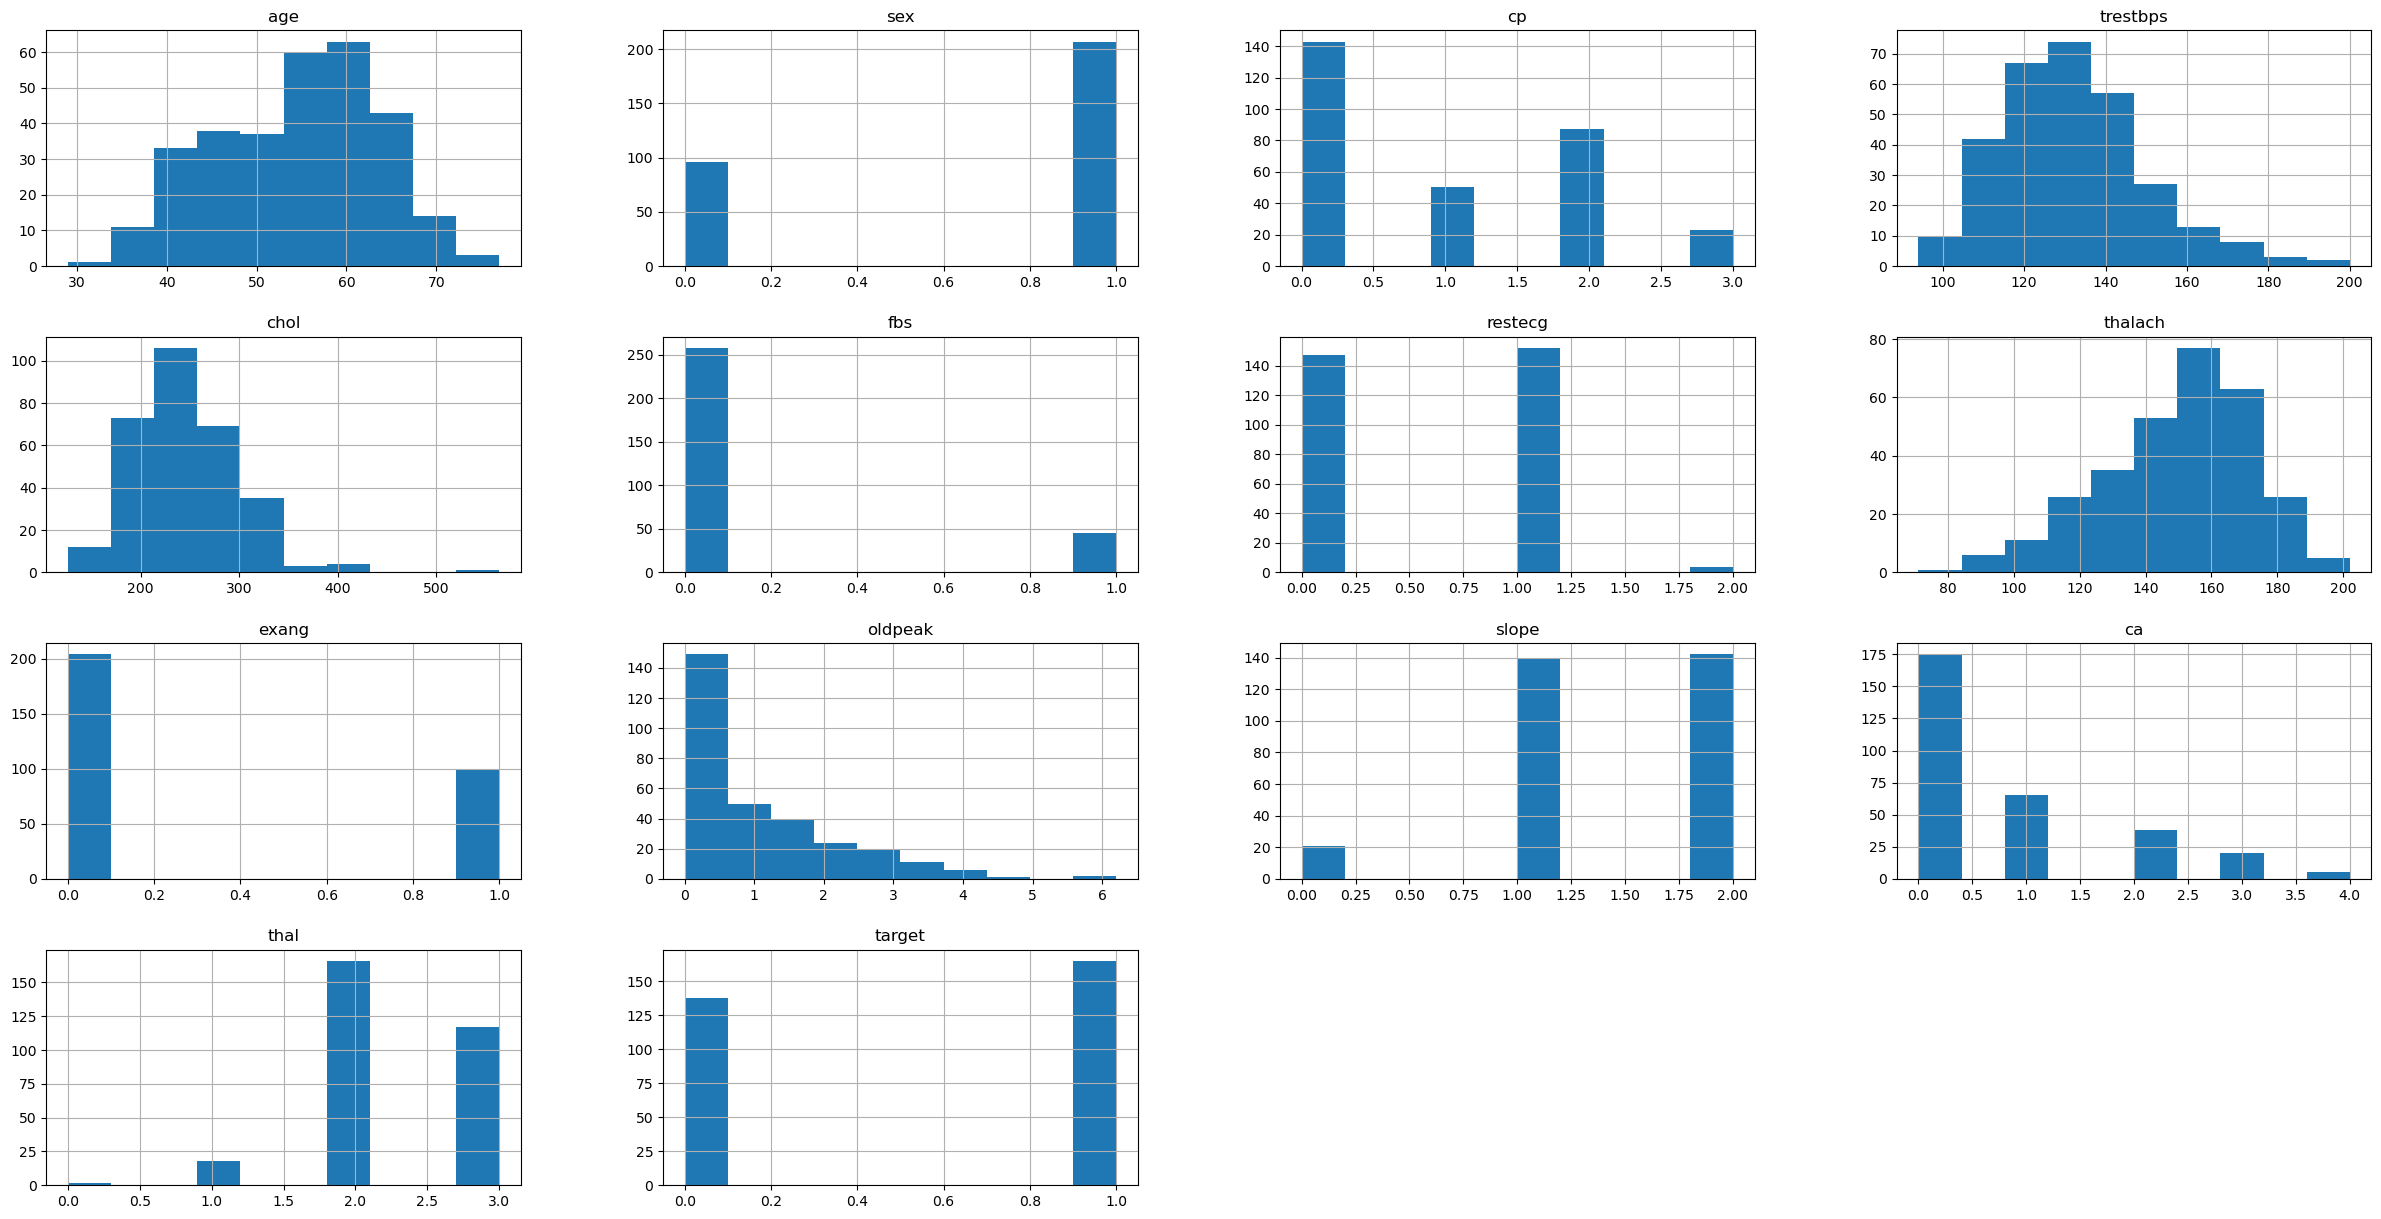

In [8]:
data.hist(figsize=(30, 15));
plt.show()

In [9]:
# This Row is OutLiar 
# any Value in col["chol"] > 400 is Te outliar & i  need REmove This col 
data.drop(data[data["chol"]>400].index, axis=0, inplace=True)

In [10]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


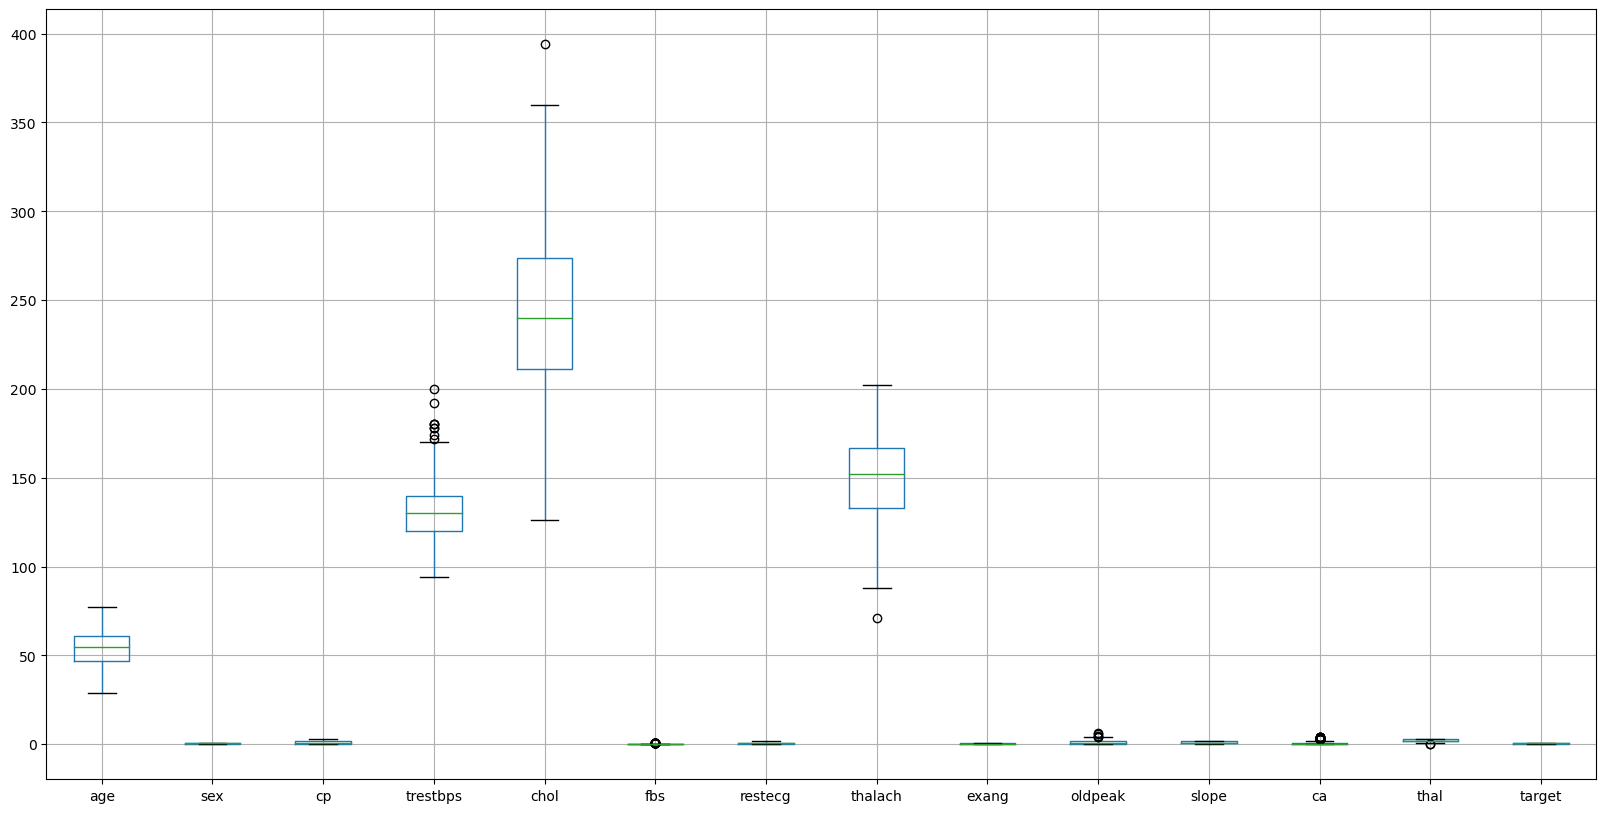

In [11]:
data.boxplot(figsize=(20,10));
plt.show()

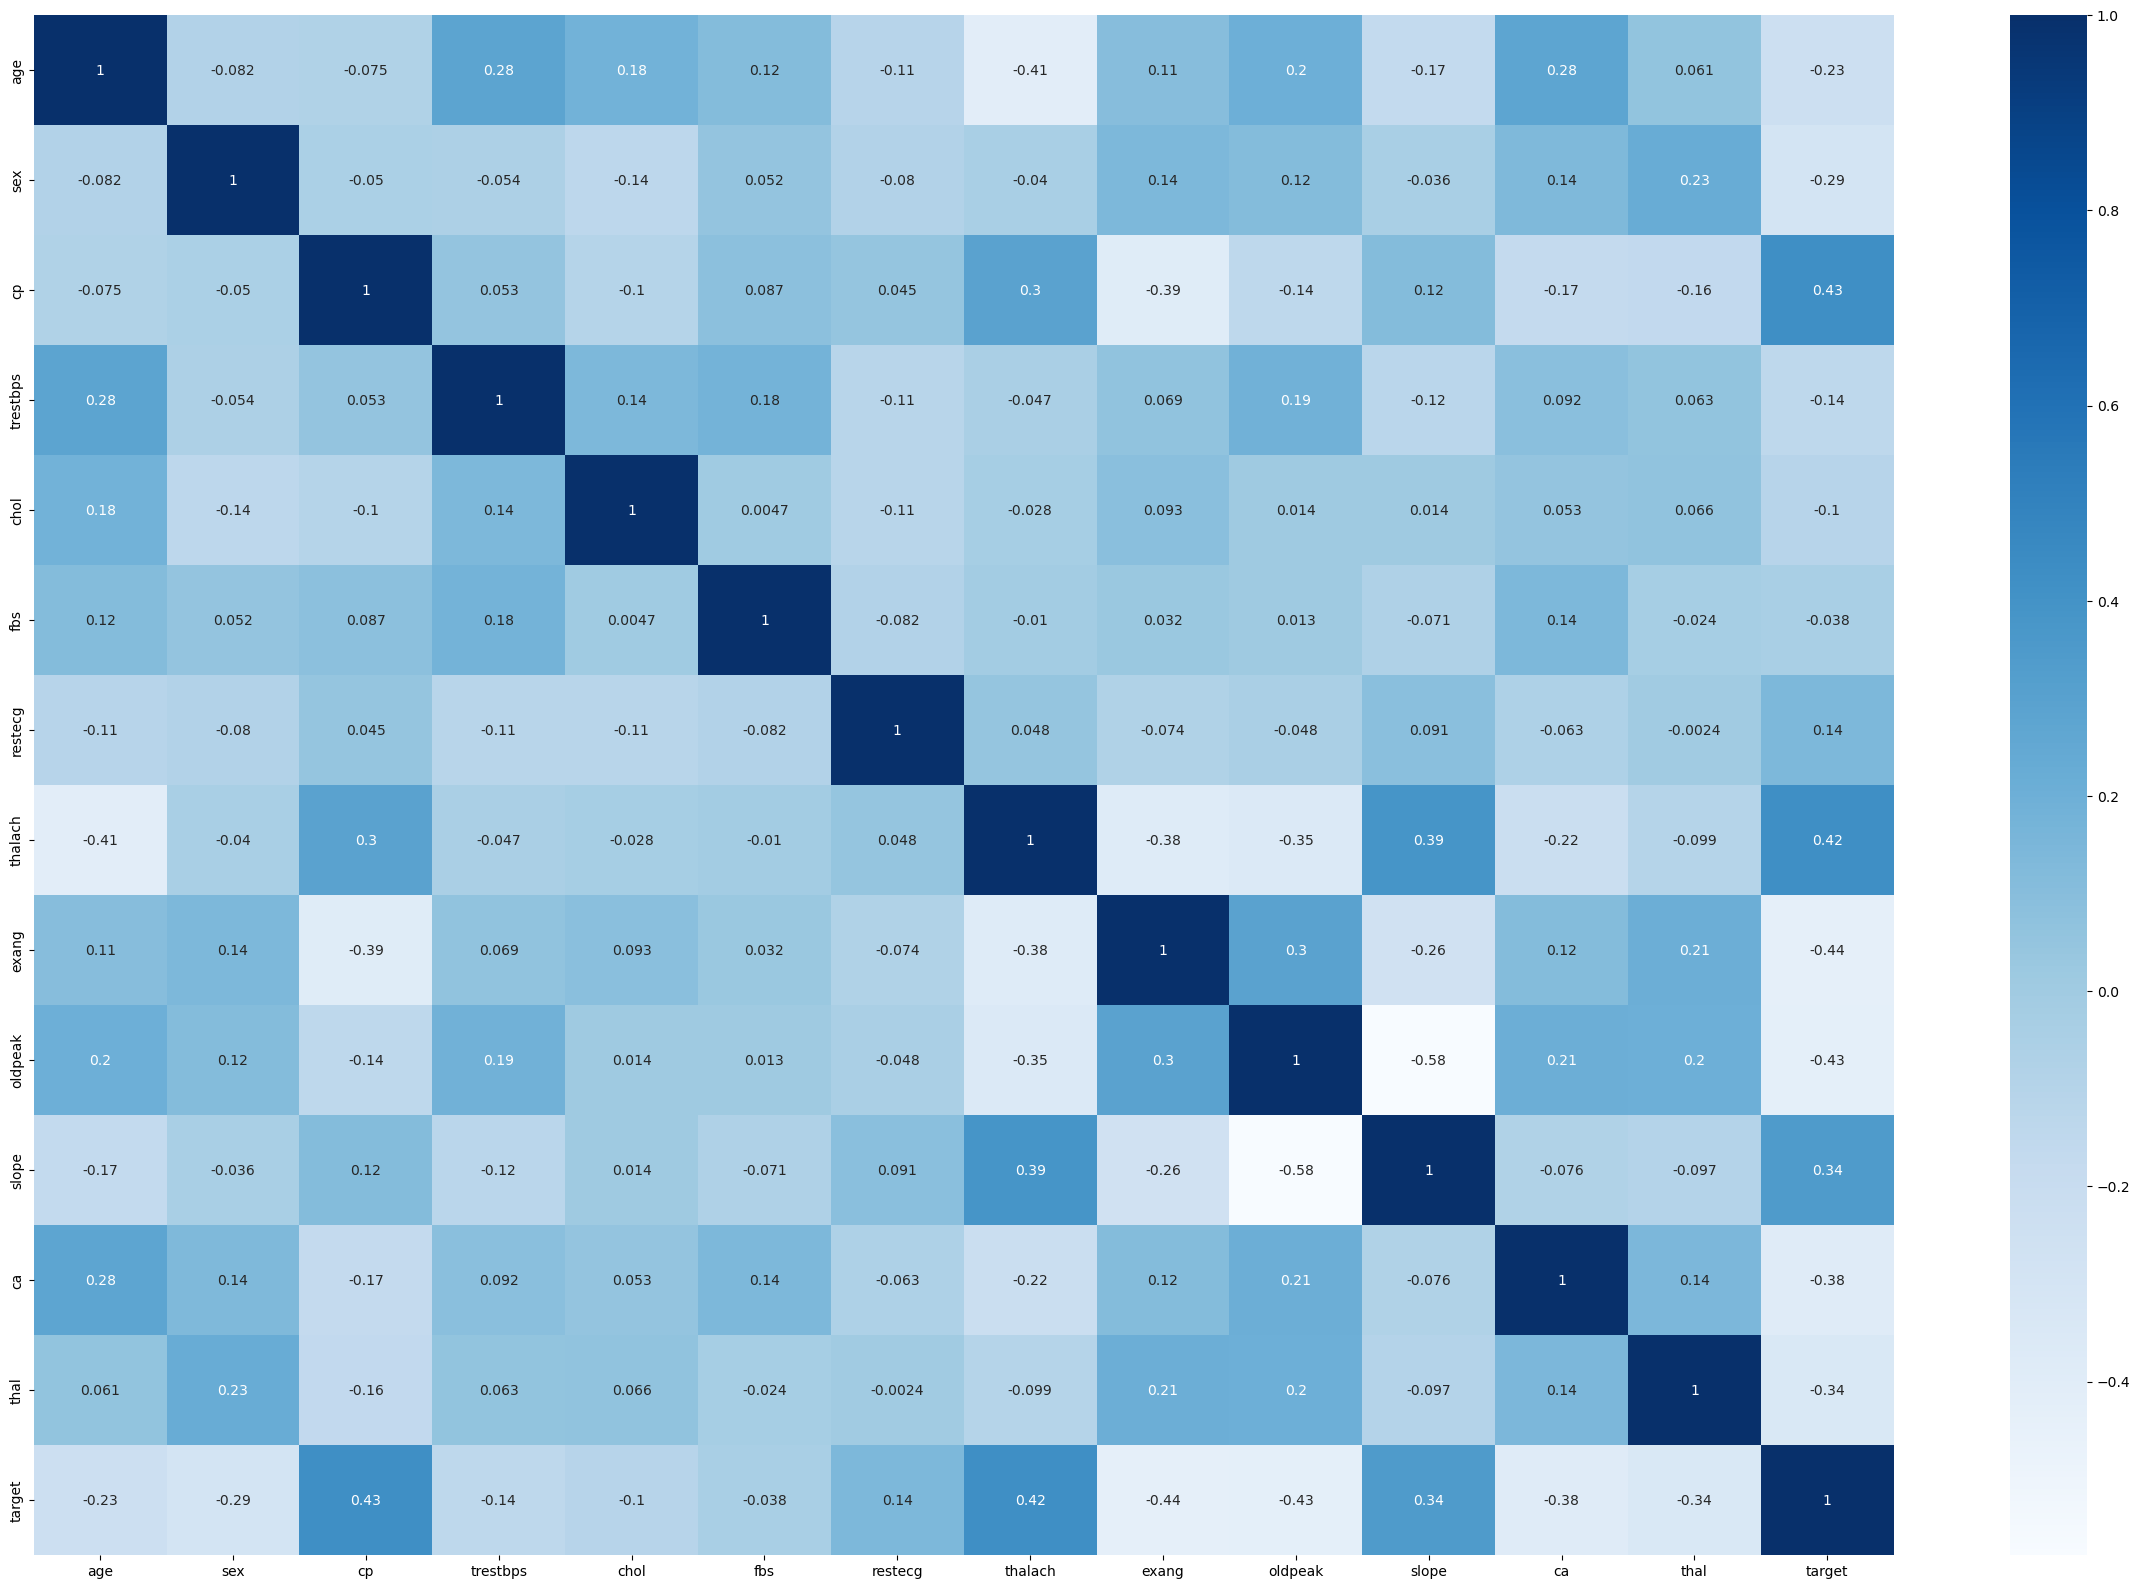

In [12]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap="Blues");
plt.show()

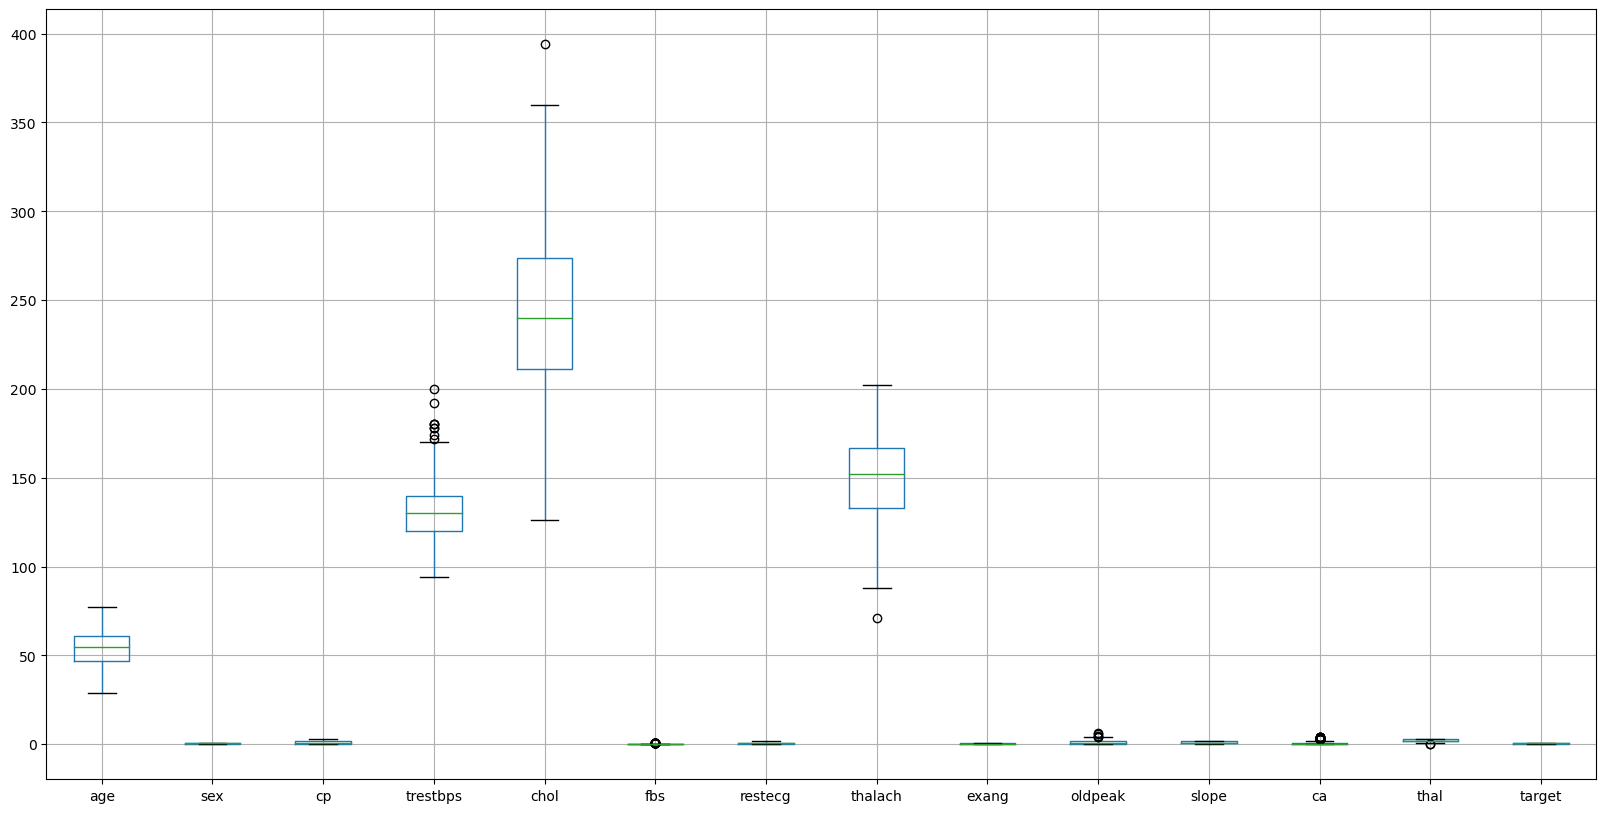

In [13]:
data.boxplot(figsize=(20,10));
plt.show()

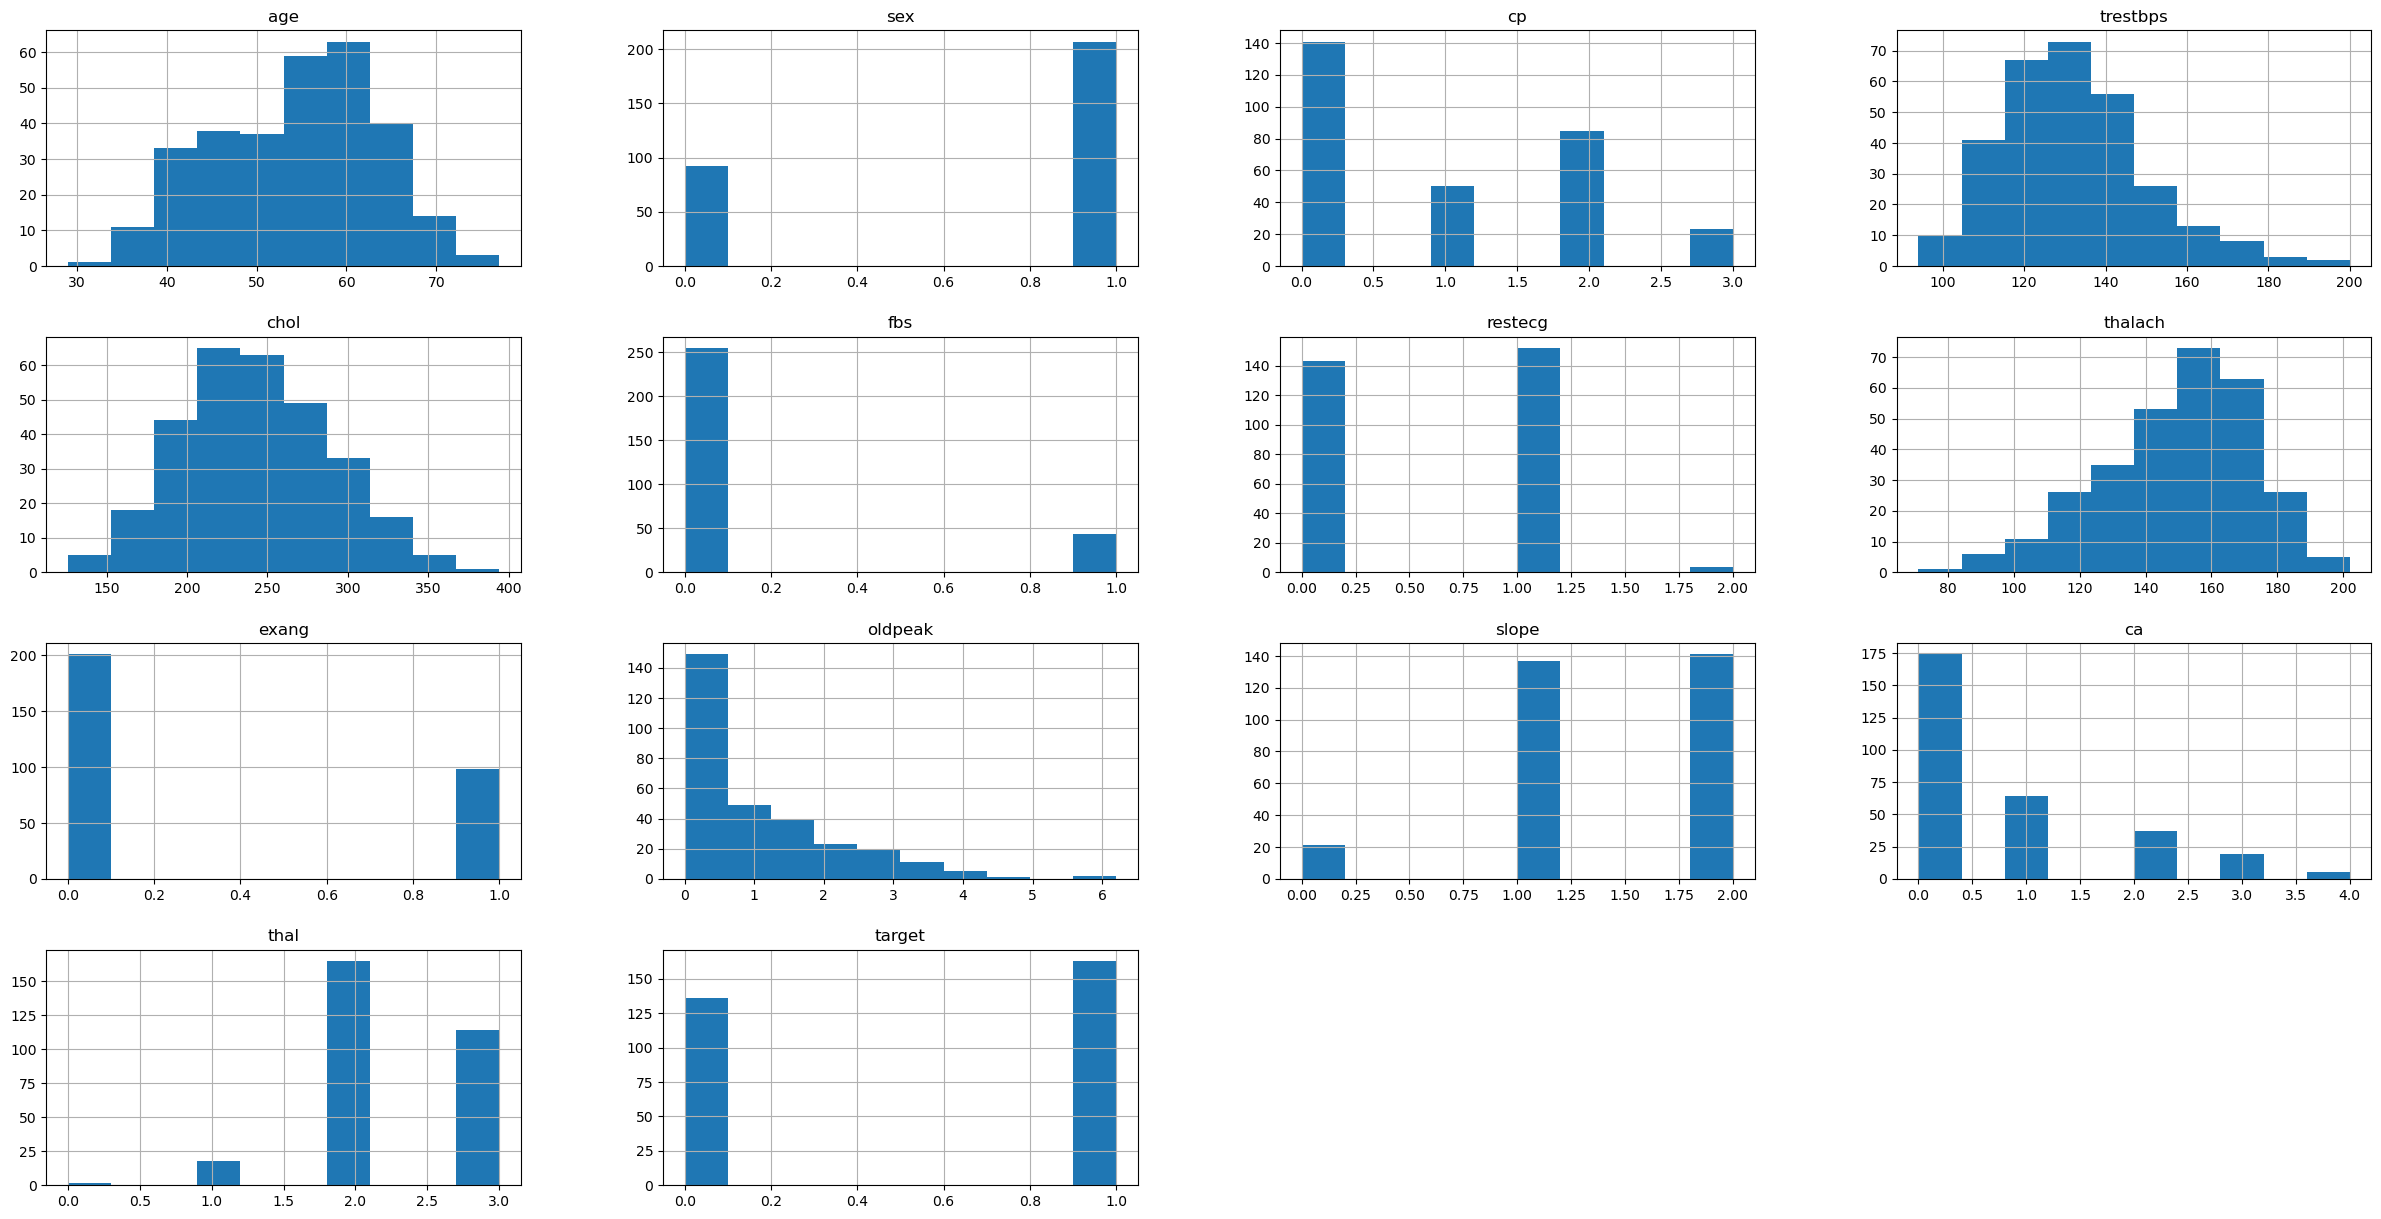

In [14]:
data.hist(figsize=(30, 15));
plt.show()

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.254181,0.692308,0.966555,131.581940,243.548495,0.147157,0.535117,149.571906,0.327759,1.025753,1.401338,0.719064,2.307692,0.545151
std,9.077719,0.462312,1.032469,17.589726,45.857602,0.354856,0.525782,23.045127,0.470183,1.154495,0.618071,1.017302,0.612214,0.498792
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.500000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,394.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
x_input = data.drop(columns="target", axis=1)
y_output = data["target"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, train_size=0.8, random_state=42)

# #Make ==> Model

In [18]:
## model1 ==> LogisticRegression

model_lo = LogisticRegression(max_iter=2000, C=1)
model_lo.fit(x_train, y_train)

train_predict = model_lo.predict(x_train)
training_model = accuracy_score(train_predict, y_train)
print(f"The accuracy_score of training is ==> {training_model}")

print("----"*20)
test_predict = model_lo.predict(x_test)
testing_model = accuracy_score(test_predict, y_test)
print(f"The accuracy_score of Testing is ==> {testing_model}")

The accuracy_score of training is ==> 0.8451882845188284
--------------------------------------------------------------------------------
The accuracy_score of Testing is ==> 0.8333333333333334


In [19]:
## model2 ==> RandomForest

model_RF = RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_estimators=30)
model_RF.fit(x_train, y_train)


train_predict = model_RF.predict(x_train)
training_model = accuracy_score(train_predict, y_train)
print(f"The accuracy_score of training is ==> {training_model}")

print("----"*20)
test_predict = model_RF.predict(x_test)
testing_model = accuracy_score(test_predict, y_test)
print(f"The accuracy_score of Testing is ==> {testing_model}")

The accuracy_score of training is ==> 0.8661087866108786
--------------------------------------------------------------------------------
The accuracy_score of Testing is ==> 0.8333333333333334


In [42]:
s = list(model_RF.feature_importances_)
feature = {}
for i, j in enumerate(data.columns[:-1]):
    feature[j] = s[i]
    
    
feature_key = feature.keys()
feature_score = feature.values()

df_feature = pd.DataFrame({"Feature":feature_key, "Score":feature_score})

,Feature,Score
0,age,0.035256
1,sex,0.039368
2,cp,0.190234
3,trestbps,0.038194
4,chol,0.027322
5,fbs,0.002782
6,restecg,0.007760
7,thalach,0.070812
8,exang,0.085361
9,oldpeak,0.130070


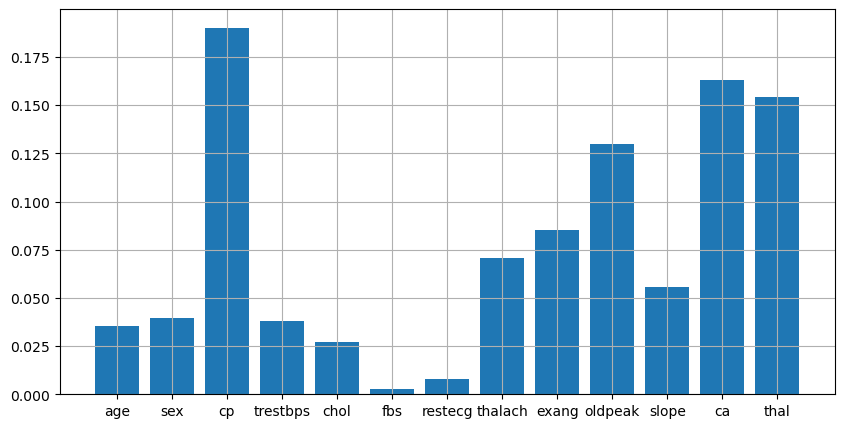

In [50]:
plt.figure(figsize=(10, 5))
plt.bar(x=df_feature["Feature"], height=df_feature["Score"])
plt.grid()
plt.show()

# # Build Sytsem prediction

In [53]:
input_data_prediction = np.asarray(
    (list(map(float, input().split(","))))
                                    ).reshape(1,-1)
# input_data_prediction

prediction = model_RF.predict(input_data_prediction)

# print(prediction)

print("--" * 20)
if prediction[0] == 0:
    print("This Person Not Have Disease Heart .")
else:
    print("This Person Have Disease Heart .")
print("--" * 20)

58,1,0,114,318,0,2,140,0,4.4,0,3,1
[0]
----------------------------------------
This Person Not Have Disease Heart
----------------------------------------


C:\Users\osama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
# MAke Hyper_parameter In LogisticRegression
param2 = {"n_estimators": np.arange(22, 27, 1),
         "max_depth": np.arange(8, 12, 1),
         "min_samples_split": np.arange(1,3),
         "min_samples_leaf": np.arange(2,4),
         "ccp_alpha": np.arange(0,1,0.2)}

new_model_RF = GridSearchCV(estimator=model_RF, 
                             param_grid=param2, 
                             verbose=6,
                             cv=5, n_jobs=-1,)
new_model_RF.fit(x_train, y_train)


new_model_RF.best_estimator_, new_model_RF.best_score_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\osama\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\osama\anaconda3\lib\site-packa

(RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=23),
 0.8493794326241135)

In [103]:
# Model_3 ==> KNN

model_KNN = KNeighborsClassifier(n_neighbors=6, p=1, leaf_size=10, weights="uniform", algorithm="brute")
model_KNN.fit(x_train, y_train)


train_predict = model_KNN.predict(x_train)
training_model = accuracy_score(train_predict, y_train)
print(f"The accuracy_score of training is ==> {training_model}")

print("----"*20)
test_predict = model_KNN.predict(x_test)
testing_model = accuracy_score(test_predict, y_test)
print(f"The accuracy_score of Testing is ==> {testing_model}")

The accuracy_score of training is ==> 0.7615062761506276
--------------------------------------------------------------------------------
The accuracy_score of Testing is ==> 0.7333333333333333


C:\Users\osama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\osama\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim